<a href="https://colab.research.google.com/github/garestrear/Curso_de_Python/blob/master/RedesNeuronales_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt

________________
# <center> Introducción </center>
________________

<div align='justify'>
<h4>
Las neuronas son células que se conectan con otras neuronas por medio de los axones y dendritas. Las regiones de conexión entre axones y dendritas se denominan sinapsis.
</h4>
</div>

<div align='center'>

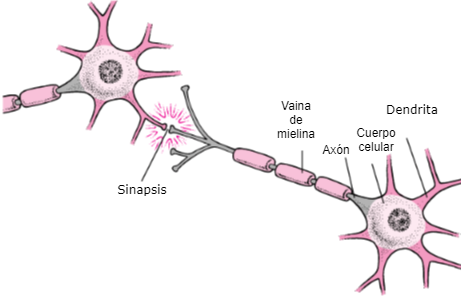

(https:// https://www.msdmanuals.com/es-cr/hogar/multimedia/figure/neu_nerve_cell_es)

</div>



<div align='justify'>
<h4>
Las fortalezas de las conexiones sinápticas a menudo cambian en respuesta a estímulos externos. Este cambio es cómo se produce el aprendizaje en los organismos vivos.
</h4>
</div>

<div align='justify'>
<h4>
Este mecanismo biológico es simulado en las redes neuronales artificiales.
</div>
</h4>

<div align='justify'>


> <h4> Brevemente, cada neurona artificial recibe una versión multiplicada de entradas y pesos aleatorios que luego se agrega con un valor de sesgo estático (único para cada capa de neuronas), esto luego se pasa a una función de activación apropiada que decide el valor final que dará la neurona. Hay varias funciones de activación disponibles según la naturaleza de los valores de entrada. Una vez que se genera la salida a partir de la capa de red neuronal final, se calcula la función de pérdida y se realiza la propagación hacia atrás ─ backpropagation, en términos simples es calcular derivadas tipo cálculo vectorial ─ donde se ajustan los pesos para hacer que la pérdida sea mínima. Encontrar valores óptimos de pesos es en lo que se centra la operación general.

</h4>
</div>


________________
# <center> Una neurona artificial </center>
________________

<div align='justify'>
<h4>
Una neurona toma $n$ entradas y produce una única salida.
</h4>

<h4>
En términos generales llamamos una neurona a cualquier cosa que tome una combinación lineal de sus entradas y aplique a esta combinación lineal alguna función no lineal ─ función de activación.
</h4>

<h4>
Lo que diferencia las salidas de diferentes neuronas son sus parámetros o pesos.
</h4>

<h4>
Una neurona también es conocida como una unidad de cómputo.
</h4>
</div>


<div align='center'>

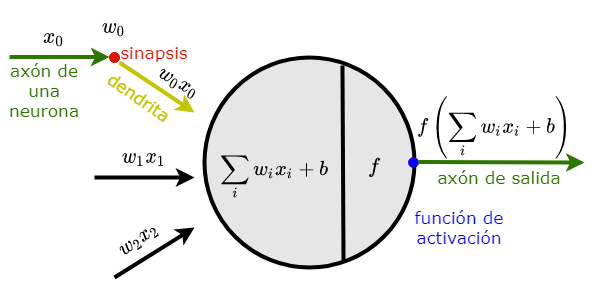

</div>

________________
# <center> Gráfico de cálculo ─ representación de una red neuronal</center>
________________

### **Las redes neuronales constan de los siguientes componentes:**

*   <h4> Datos de entrada $X$ (Capa de entrada) </h4>
*   <h4> Una cantidad arbitraria de **capas ocultas** </h4>
*   <h4> Una capa de salida, $y$ </h4>
*   <h4> Un conjunto de **pesos** y **sesgos** entre cada capa, $W$ y $b$ </h4>
*   <h4> Una opción de **función de activación** para cada capa oculta, $\sigma$. </h4>


<div align='center'>

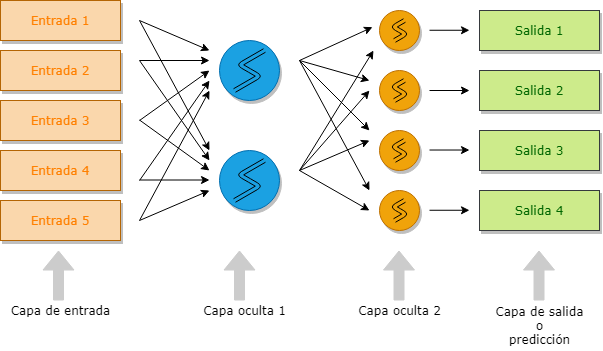

</div>

<div align='justify'>

<h4>
Matemáticamente hablando una red neuronal es una función encajada (composición)
$$ y = f_{NN}(X). $$
</h4>

<h4>
Por ejemplo una red neuronal de 3 - capas que regresa un escalar, 
$f_{NN}$ se ve como
$$ y = f_{NN}(X) = f_3(f_2(f_1(X))). $$
</h4>

<h4>
En este ejemplo $f_3$ y $f_2$ son funciones vectoriales de la forma:
$$ f_j = g_j(W_j z + b_j) $$
donde $j$ es el índice de capa y puede abarcar desde 1 hasta cualquier número de capas.
La función $g_j$ se denomina función de activación.
Es una función fija, generalmente no lineal, elegida antes de iniciar el aprendizaje. 
Los parámetros $W_j$ (una matriz) y $b_j$ (un vector).
</h4>

<h4>
La función $f_3$ es una función escalar para la tarea de regresión,
pero también puede ser una función vectorial dependiendo de su problema.
</h4>

<h4>
Como $g_j$ es una función vectorial.
Cada fila $w_{j,u}$ ($u$ por unidad) de la matriz $W_j$ es un vector de la misma dimensionalidad que z.
Sea $a_{j,u} = w_{j,u} z + b_{j, u}$.
La salida de $f_j(z)$ es un vector
$[g_j(a_{l, 1}), g_j(a_{l, 2}) ,. . . , g_j(a_{l, tamaño l})]$,
donde $g_j$ es una función escalar, y el $tamaño_j$ es el número de
unidades en la capa $j$.
</h4>

</div>

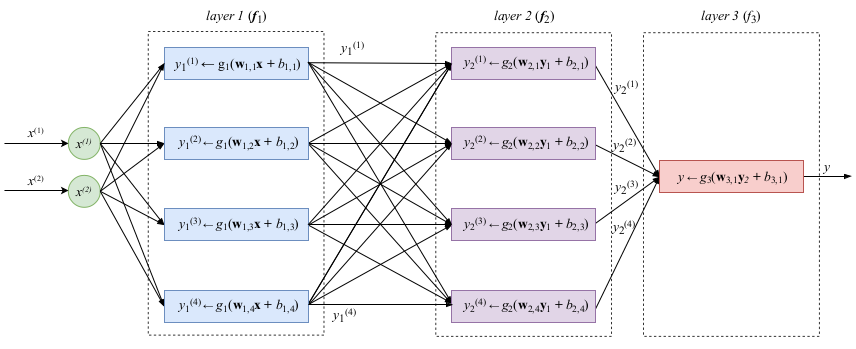

________________
# <center> Arquitectura de redes neuronales </center>
________________
<h4>Consiste en definir </h4>


*   <h4>el número de capas,</h4>
*   <h4>el número de neuronas en cada capa, </h4>
*   <h4>la función de activación de cada neurona,</h4>
*   <h4>la función de pérdida y</h4>
*   <h4>el método de optimización para minimizar la función de pérdida.</h4>

________________
# <center> Una sola capa de neuronas </center>
________________

<h4>Habíamos dicho que una neurona toma $n$ entradas y produce una única salida, asumamos que en nuestro caso la función de activación es la sigmoide:</h4>


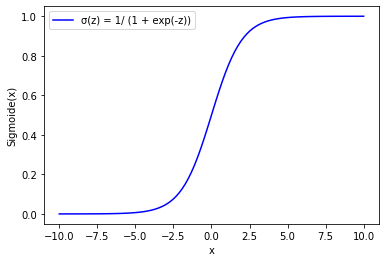

In [ ]:
#@title Función de activación Sigmoide 
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("Sigmoide(x)") 
plt.legend(['σ(z) = 1/ (1 + exp(-z))'])

plt.show() 

$$\sigma(z)=\frac{1}{1+\exp (-z)}$$

<h4>donde</h4> $$\sigma(z) \in(0,1)$$

<h4>El gradiente de $\sigma(z)$ es:</h4>

$$ \sigma^{\prime}(z)=\frac{-\exp (-z)}{1+\exp (-z)}=\sigma(z)(1-\sigma(z))$$

<h4>
Supongamos que tenemos una única capa de $m$ neuronas. Si nos referimos a los pesos de las diferentes neuronas como $\left\{w^{(1)}, \cdots, w^{(m)}\right\}$ 
y a los sesgos como $\left\{b_{1}, \cdots, b_{m}\right\},$ podemos decir que las respectivas activaciones son $\left\{a_{1}, \cdots, a_{m}\right\}$:
</h4>
$$
\begin{aligned}
a_{1} &=\frac{1}{1+\exp \left(-(w^{(1) T} x+b_{1})\right)} \\
\vdots & \\
a_{m} &=\frac{1}{1+\exp \left(-(w^{(m) T} x+b_{m})\right)}
\end{aligned}
$$

<h4>
Reescribiendo:
</h4>
<div align='center'>
$
\sigma(z)=\left[\begin{array}{c}
\frac{1}{1+\exp \left(z_{1}\right)} \\
\vdots \\
\frac{1}{1+\exp \left(z_{m}\right)}
\end{array}\right], \qquad
b=\left[\begin{array}{c}
b_{1} \\
\vdots \\
b_{m}
\end{array}\right] \in \mathbb{R}^{m}, \qquad
W=\left[\begin{array}{ccc}
- & w^{(1) T} & - \\
& \ldots & \\
- & w^{(m) T} & -
\end{array}\right] \in \mathbb{R}^{m \times n}
$
</div>
<h4>
Reescribiendo de nuevo:
</h4>
<div align='center'>
$
z=W x+b, \qquad
\left[\begin{array}{c}
a^{(1)} \\
\vdots \\
a^{(m)}
\end{array}\right]=\sigma(z)=\sigma(W x+b)
$
</div>

<div align='justify'>



> <h4> Entonces, ¿qué nos dicen realmente estas activaciones? Bien, uno puede pensar en estas activaciones como indicadores de la presencia de alguna combinación ponderada de características. Entonces podemos usar una combinación de estas activaciones para realizar tareas de clasificación.


</h4>
</div>

________________
# <center> Propagación hacia atrás ─ Backpropagation, backward propagation of errors </center>
________________
<div align='justify'>

<h4>
Cuando se tiene un modelo de ML la siguiente pregunta es siempre ¿cómo medir la el error del modelo? Supongamos que nuestra función de pérdida es 
</h4>
$$
L(W) = \sum_{i=1}^{\ell} L \left(W; x_i; y_i\right)
$$
<h4>
── la función de pérdida es esencialmente una suma de pérdidas sobre cada elemento en el conjunto de entrenamiento.
</h4>
<h4>
Luego lo que tenemos que hacer es minimizar el error con repecto a $W$
</h4>
$$
L(W) = \sum_{i=1}^{\ell} L \left(W; x_i; y_i\right) \rightarrow \underset{\rm W}{\rm \mathrm{min}}
$$
<h4>
Cuando la función de pérdida es diferenciable el proceso de minimización se centra en aproximar el gradiente de la función de pérdida, lo que en cualquier caso implica calcular gradientes y entonces la parte "hacia atrás" del nombre proviene del hecho de que el cálculo del gradiente avanza hacia atrás a través de la red:
</h4>
<h4>
el gradiente de la capa final se calcula primero y el gradiente de la primera capa de pesos se calcula en último lugar. Cómputos parciales de gradientes de una capa se utilizan para hacer el cómputo en la capa previa...como en cálculo!
</h4>
</div>

<div align='center'>

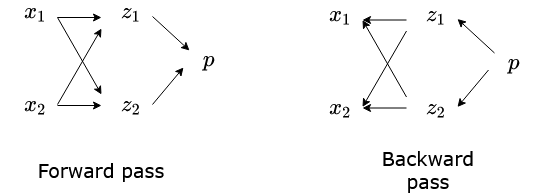

</div>

<div align='justify'>
<h4>Este flujo hacia atrás de la información de error permite un cálculo eficiente del gradiente en cada capa frente al enfoque ingenuo de calcular el gradiente de cada capa por separado.</h4>

<h4>
En la propagación hacia atrás, los pesos se modifican para reducir la pérdida. También se actualizan los sesgos.
</h4>
</div>

________________
# <center> Usos típicos de las redes neuronales </center>
________________


<div align='justify'>

* **Clasificación de datos:**
Basándose en un conjunto de datos, nuestra red neuronal entrenada predice si es un perro o un gato.
* **Detección de anomalías:**
Dados los detalles sobre las transacciones de una persona, se puede decir si la transacción es un fraude o no.
* **Reconocimiento de voz:**
Podemos entrenar nuestra red neuronal para reconocer patrones de habla. Ejemplo: Siri, Alexa, asistente de Google.
* **Generación de audio:**
Dadas las entradas como archivos de audio, puede generar nueva música basada en varios factores como el género, el cantante y otros.
* **Análisis de series temporales:**
Una red neuronal bien entrenada puede predecir el precio de las acciones.
* **Corrección ortográfica:**
Podemos entrenar una red neuronal que detecta errores ortográficos y también puede sugerir un significado similar para las palabras. Ejemplo: gramaticalmente
* **Reconocimiento de caracteres:**
Una red neuronal bien entrenada puede detectar caracteres escritos a mano.
* **Máquina traductora:**
Podemos desarrollar una red neuronal que traduzca un idioma a otro.
* **Procesamiento de imágenes:**
Podemos entrenar una red neuronal para procesar una imagen y extraer información de ella.
</div>

________________
# <center> Aprendizaje profundo </center>
________________

<h4>Se refiere al entrenamineto de redes neuronales con múltiples capas entre la capa de entrada y de predicción.</h4>


________________
# <center>  Otras funciones de activación </center>
_________________ 

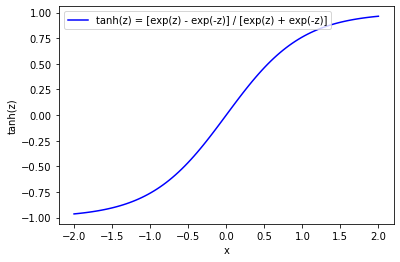

In [ ]:
#@title Tanh
x = np.linspace(-2, 2, 100) 
z = np.tanh(x)

plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("tanh(z)") 
plt.legend(['tanh(z) = [exp(z) - exp(-z)] / [exp(z) + exp(-z)]'])
  
plt.show() 

<div align='justify'>

**Tanh**: La función tanh es una alternativa a la función sigmoide que a menudo converge más rápidamente en la práctica. La principal diferencia entre la tanh y la sigmoide es que la salida de tanh varía de $-1$ a $1$ mientras que la sigmoide varía de $0$ a $1$.

$$
\begin{array}{l}
\tanh (z)=\frac{\exp (z)-\exp (-z)}{\exp (z)+\exp (-z)}=2 \sigma(2 z)-1 \\
\end{array}
$$

donde

$$\tanh (z) \in(-1,1)$$

El gradiente $\tanh (z)$ es:
$$
\tanh ^{\prime}(z)=1-\left(\frac{\exp (z)-\exp (-z)}{\exp (z)+\exp (-z)}\right)^{2}=1-\tanh ^{2}(z)
$$
</div>

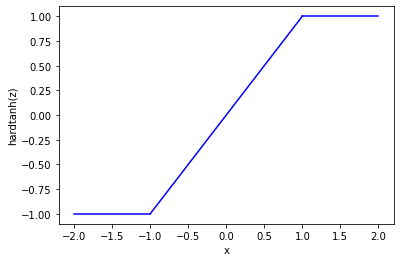

In [ ]:
#@title Hard tanh
x = np.linspace(-1, 1, 100) 

z = x
z3 = 1

plt.plot([-2, -1 ], [-1, -1], c = 'b') 
plt.plot(x, z, c = 'b') 
plt.plot([1, 2], [1, 1], c = 'b') 
plt.xlabel("x") 
plt.ylabel("hardtanh(z)") 
  
plt.show()

<div align='justify'>

**Hard tanh**: La función hard tanh a veces se prefiere a la función tanh ya que es computacionalmente más barata. Sin embargo, se satura para magnitudes de $z$ mayores que $ 1.$ 

$$
\text { hardtanh }(z)=\left\{\begin{array}{ll}
-1, &  z<-1 \\
z, & -1 \leq z \leq 1 \\
1, &  z>1
\end{array}\right.
$$
con derivada:

$$
\text { hardtanh }^{\prime}(z)=\left\{\begin{array}{ll}
1 & :-1 \leq z \leq 1 \\
0 & : \text { otherwise }
\end{array}\right.
$$
</div>

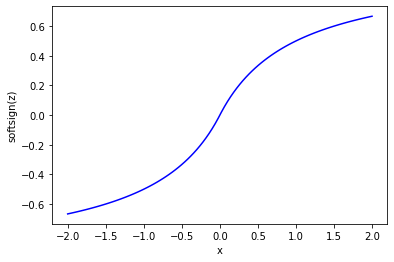

In [ ]:
#@title soft sign
x = np.linspace(-2, 2, 100) 
z = x/(1 + np.abs(x)) 
  
plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("softsign(z)") 
  
plt.show() 

<div align='justify'>

**Soft sign**: La función soft sign puede considerarse una alternativa a tanh ya que tampoco se satura tan fácilmente como las funciones de recorte duro:

$$
\operatorname{softsign}(z)=\frac{z}{1+|z|}
$$
La derivada:
$$
\operatorname{softsign}^{\prime}(z)=\frac{\operatorname{sgn}(z)}{(1+z)^{2}}
$$
donde $\mathrm{sgn}$ es la función signo.
</div>

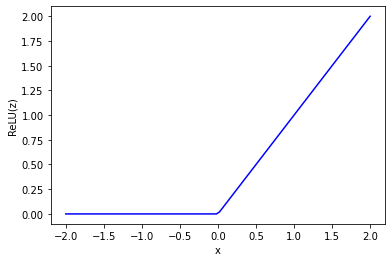

In [ ]:
#@title ReLU
x = np.linspace(-2, 2, 100) 
z = np.maximum(x,0) 
  
plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("ReLU(z)") 
  
plt.show() 

<div align='justify'>

**ReLU**: La función ReLU (Unidad lineal rectificada) es una opción popular de activación, ya que no se satura incluso para valores mayores de $z$ y ha tenido mucho éxito en aplicaciones de visión por computadora.

$$
\operatorname{rect}(z)=\max (z, 0)
$$

La derivada:

$$
\operatorname{rect}^{\prime}(z)=\left\{\begin{array}{ll}
1 & : z>0 \\
0 & : \text { otherwise }
\end{array}\right.
$$
</div>

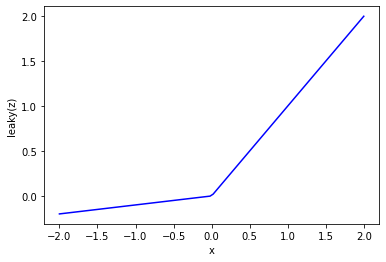

In [ ]:
#@title Leaky ReLU
k = 0.1
x = np.linspace(-2, 2, 100) 
z = np.maximum(x, k * x) 
  
plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("leaky(z)") 
  
plt.show() 

<div align='justify'>

Las unidades ReLU tradicionales por diseño no propagan ningún error para $ z $ no positivos; Leaky ReLU modifica esto de manera que se permite que un pequeño error se propague hacia atrás incluso cuando $z$ es negativo:

$$
\begin{array}{c}
\operatorname{leaky}(z)=\max (z, k \cdot z) \\
\text { donde } 0<k<1
\end{array}
$$

La derivada

$$
\operatorname{leaky}^{\prime}(z)=\left\{\begin{array}{ll}
1 & : z>0 \\
k & : \text { otherwise }
\end{array}\right.
$$
</div>